Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 



The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.
We provide the data both in .ods and in .xlsx formats.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform, randint
import pickle

In [38]:
df_initial = pd.read_excel('../data/raw/Folds5x2_pp.xlsx')

In [39]:
df_initial.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [40]:


df_initial.shape

(9568, 5)

In [41]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [42]:
df_initial.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

Correlation matrix:
           AT         V        AP        RH
AT  1.000000  0.844107 -0.507549 -0.542535
V   0.844107  1.000000 -0.413502 -0.312187
AP -0.507549 -0.413502  1.000000  0.099574
RH -0.542535 -0.312187  0.099574  1.000000


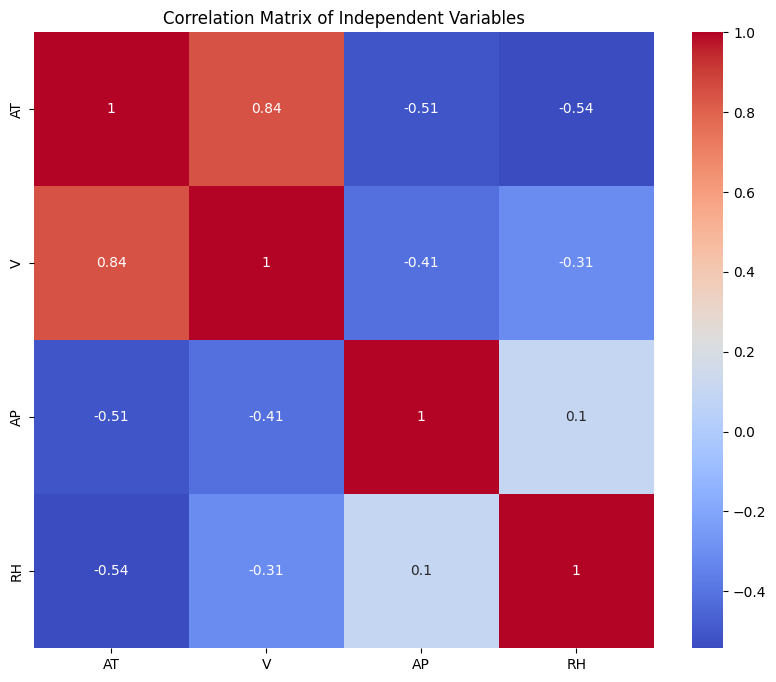

KeyboardInterrupt: 

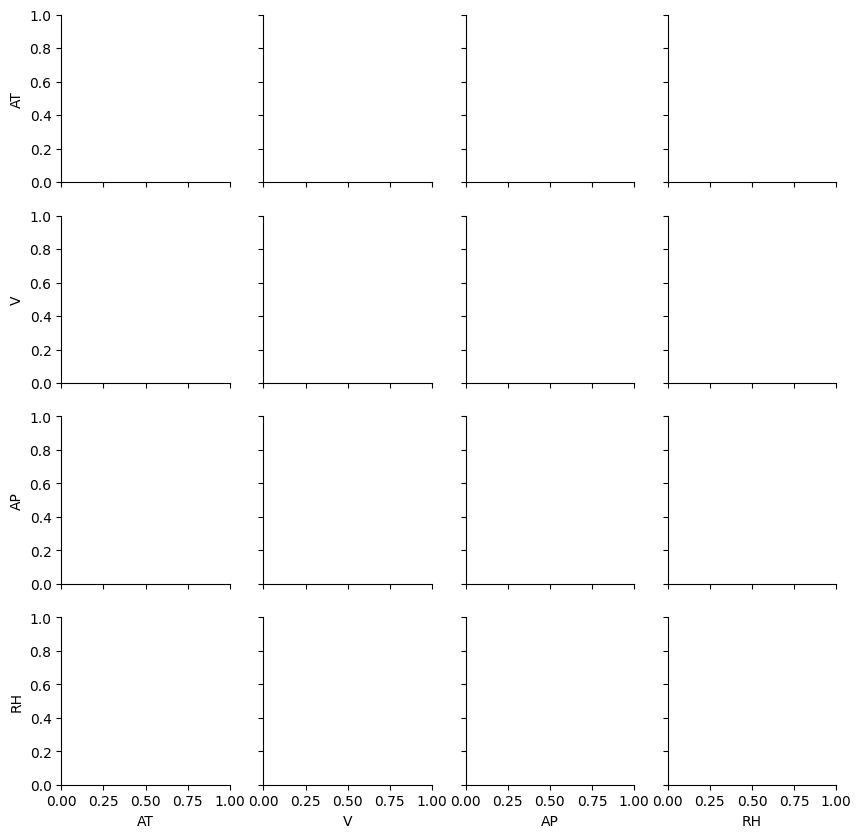

In [43]:


# Assuming the dependent column is named 'dependent' and independent columns are 'independent1', 'independent2', etc.
independent_vars = ['AT', 'V', 'AP', 'RH']
dependent_var = 'PE'

# 1. Check dependency among independent variables

# Correlation matrix
corr_matrix = df_initial[independent_vars].corr()
print("Correlation matrix:\n", corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# 2. Visualize each independent variable with the dependent variable

# Pair plot for all independent variables
sns.pairplot(df_initial[independent_vars])
plt.suptitle('Pair Plot of Independent Variables', y=1.02)
plt.show()

# Scatter plots for each independent variable with the dependent variable
for independent_var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_initial[independent_var], y=df_initial[dependent_var])
    plt.title(f'{independent_var} vs {dependent_var}')
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.show()


In [ ]:
# dividing dependent and independent features

X = df_initial.drop(columns=[dependent_var ])
y = df_initial[dependent_var]

In [ ]:
X.shape

(9568, 4)

In [ ]:
y.shape

(9568,)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
file_path = '../data/raw/your_file.xlsx'
df = pd.read_excel(file_path)

# Assuming the dependent column is named 'dependent' and independent columns are 'independent1', 'independent2', etc.
independent_vars = ['independent1', 'independent2', 'independent3', 'independent4']
dependent_var = 'dependent'

# 1. Check dependency among independent variables

# Correlation matrix
corr_matrix = df[independent_vars].corr()
print("Correlation matrix:\n", corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# 2. Visualize each independent variable with the dependent variable

# Pair plot for all independent variables
sns.pairplot(df[independent_vars])
plt.suptitle('Pair Plot of Independent Variables', y=1.02)
plt.show()

# Scatter plots for each independent variable with the dependent variable
for independent_var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[independent_var], y=df[dependent_var])
    plt.title(f'{independent_var} vs {dependent_var}')
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.show()


Correlation matrix:
           AT         V        AP        RH
AT  1.000000  0.843811 -0.507519 -0.542864
V   0.843811  1.000000 -0.416997 -0.309921
AP -0.507519 -0.416997  1.000000  0.102114
RH -0.542864 -0.309921  0.102114  1.000000


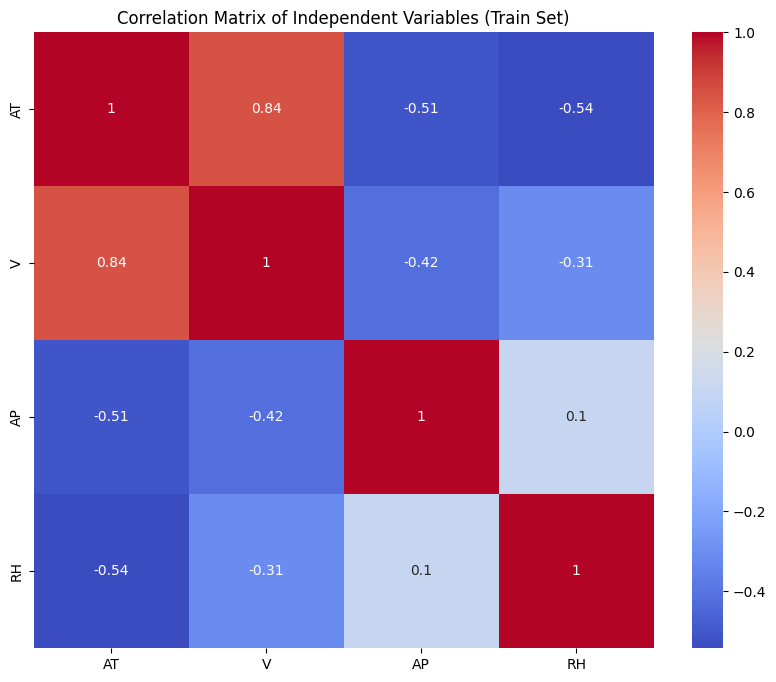

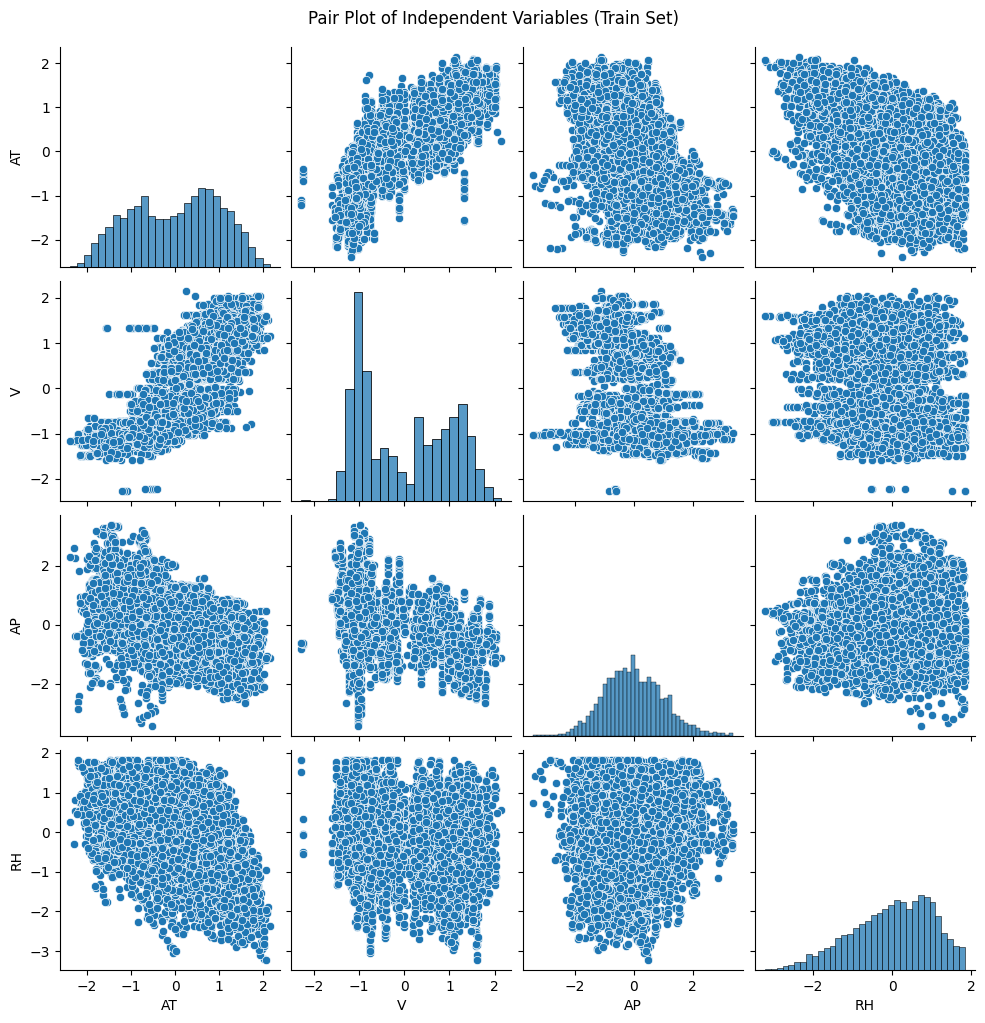

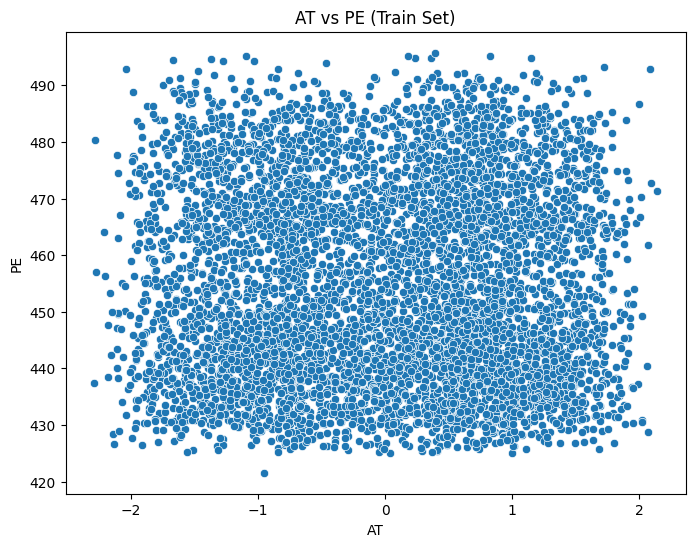

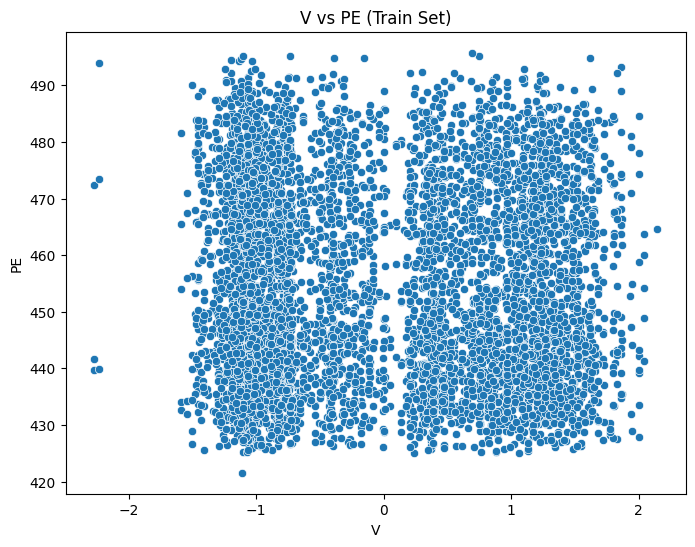

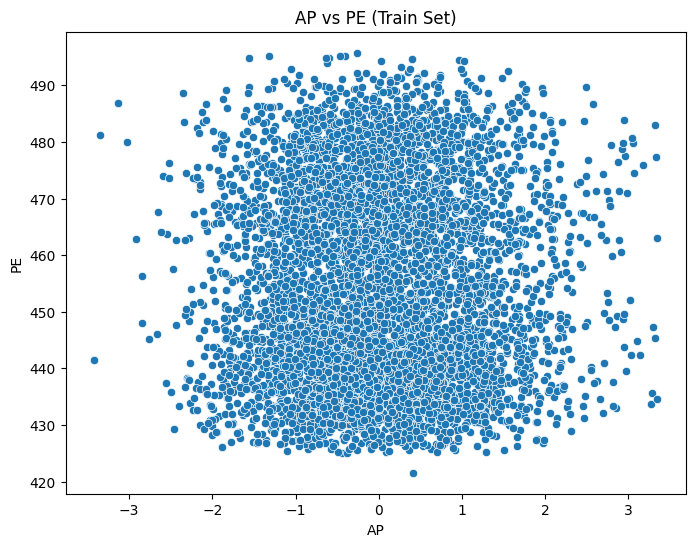

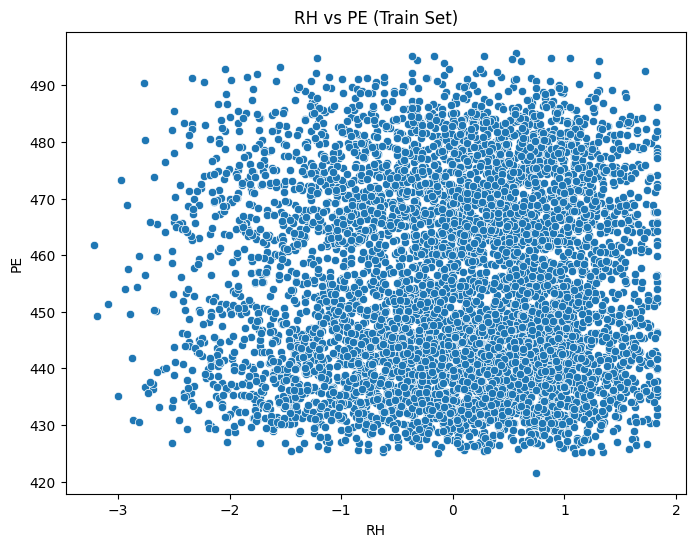

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Scaling the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Correlation matrix for training data
corr_matrix = X_train_scaled.corr()
print("Correlation matrix:\n", corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Independent Variables (Train Set)')
plt.show()

# Pair plot for all independent variables in the training set
sns.pairplot(X_train_scaled)
plt.suptitle('Pair Plot of Independent Variables (Train Set)', y=1.02)
plt.show()

# Scatter plots for each independent variable with the dependent variable in the training set
for independent_var in X_train.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_train_scaled[independent_var], y=y_train)
    plt.title(f'{independent_var} vs {dependent_var} (Train Set)')
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21448\3224651102.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_initial[column], shade=True)


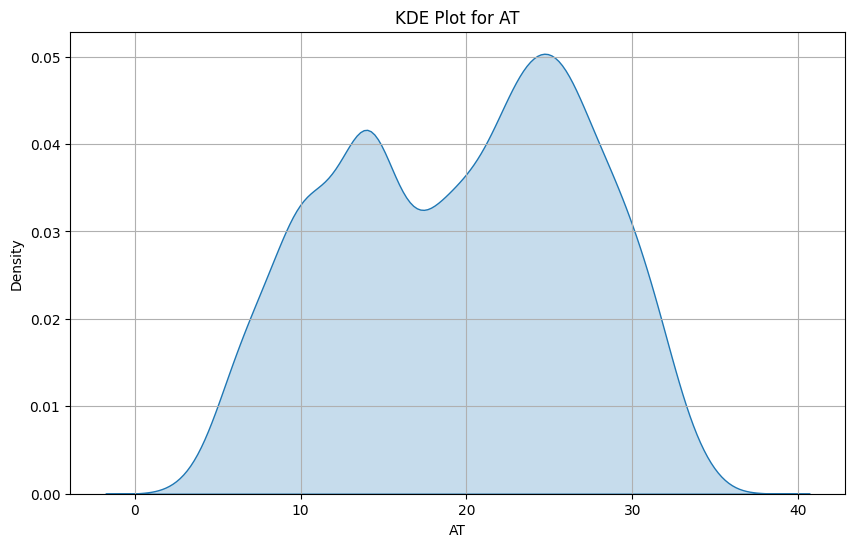

C:\Users\user\AppData\Local\Temp\ipykernel_21448\3224651102.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_initial[column], shade=True)


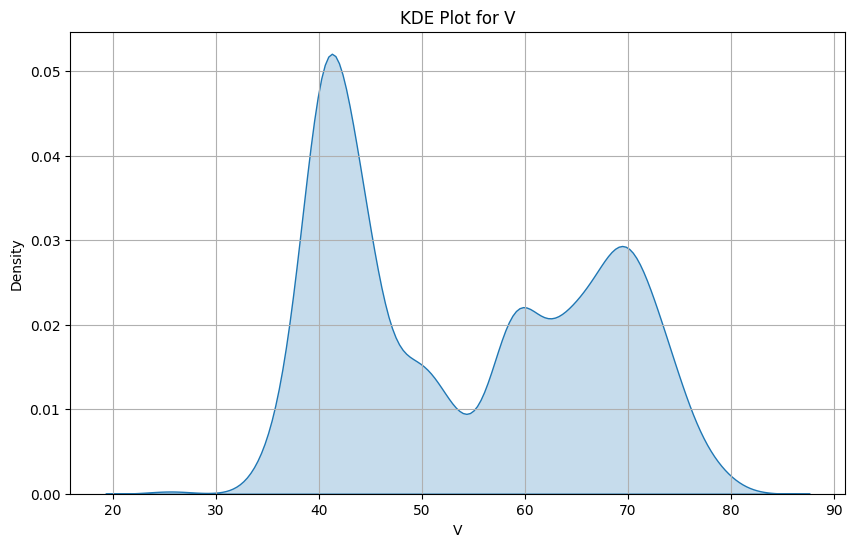

C:\Users\user\AppData\Local\Temp\ipykernel_21448\3224651102.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_initial[column], shade=True)


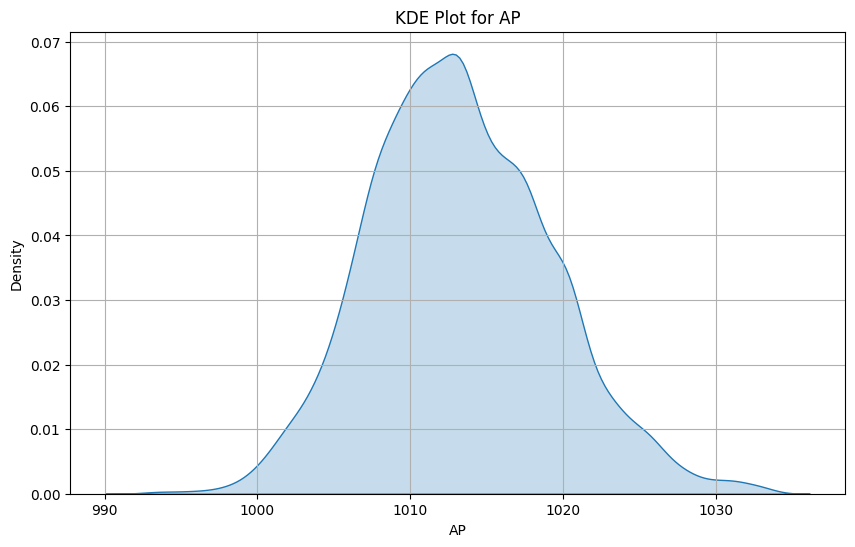

C:\Users\user\AppData\Local\Temp\ipykernel_21448\3224651102.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_initial[column], shade=True)


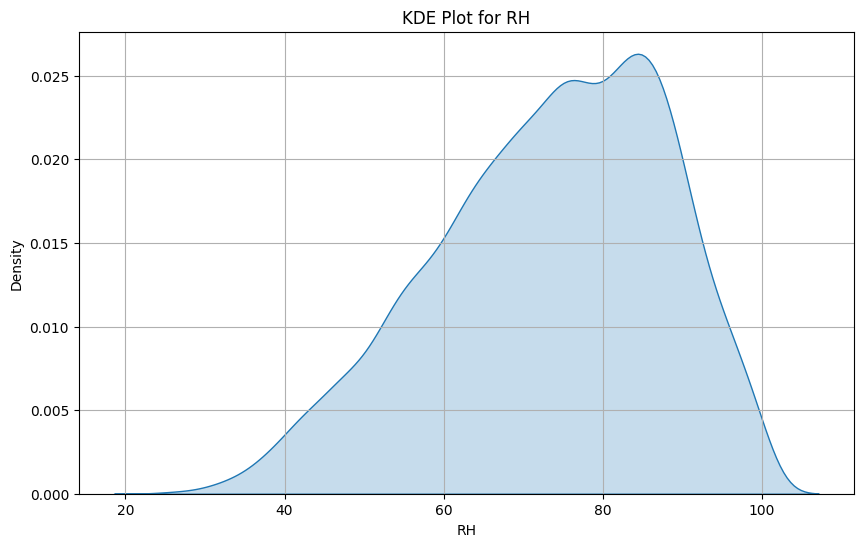

C:\Users\user\AppData\Local\Temp\ipykernel_21448\3224651102.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_initial[column], shade=True)


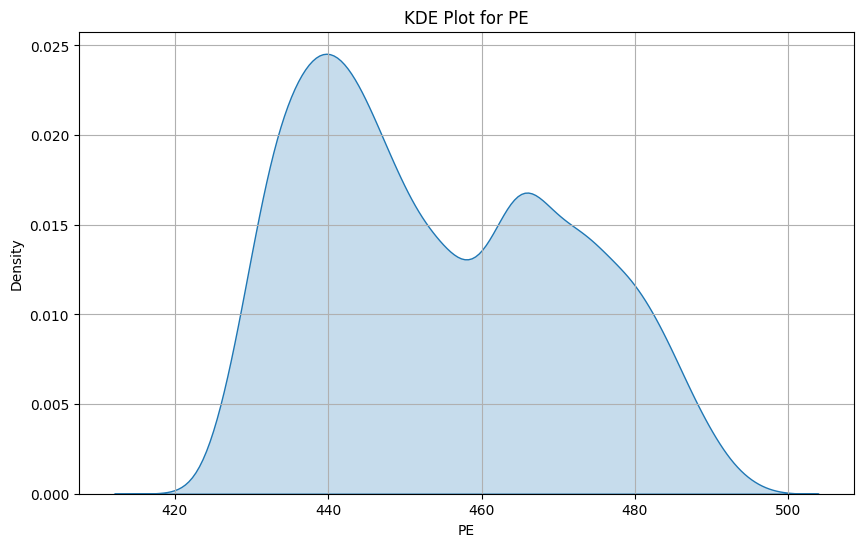

In [53]:

# Plot KDE for all columns
for column in df_initial.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_initial[column], shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


In [ ]:
class RegressorEvaluator:
    def __init__(self, y_true, y_pred, n_features):
        self.y_true = y_true
        self.y_pred = y_pred
        self.n_features = n_features
    
    def mean_absolute_error(self):
        return mean_absolute_error(self.y_true, self.y_pred)
    #MSE
    def mean_squared_error(self):
        return mean_squared_error(self.y_true, self.y_pred)
    
    def root_mean_squared_error(self):
        return np.sqrt(mean_squared_error(self.y_true, self.y_pred))
    
    def r2_score(self):
        return r2_score(self.y_true, self.y_pred)
    
    def adjusted_r2_score(self):
        n = len(self.y_true)
        r2 = self.r2_score()
        return 1 - ((1 - r2) * (n - 1) / (n - self.n_features - 1))
    
    def mean_absolute_percentage_error(self):
        return mean_absolute_percentage_error(self.y_true, self.y_pred)
    
    def evaluate_all(self):
        metrics = {
            'Mean Absolute Error': self.mean_absolute_error(),
            'Mean Squared Error': self.mean_squared_error(),
            'Root Mean Squared Error': self.root_mean_squared_error(),
            'R^2 Score': self.r2_score(),
            'Adjusted R^2 Score': self.adjusted_r2_score(),
            'Mean Absolute Percentage Error': self.mean_absolute_percentage_error()
        }
        return metrics

# Example usage:
# Assuming y_true and y_pred are your true and predicted values respectively
# n_features is the number of independent variables in the model

y_true = [3.0, -0.5, 2.0, 7.0]
y_pred = [2.5, 0.0, 2.1, 7.8]
n_features = 2  # Replace with the actual number of features

evaluator = RegressorEvaluator(y_true, y_pred, n_features)
results = evaluator.evaluate_all()

for metric, value in results.items():
    print(f"{metric}: {value}")

Mean Absolute Error: 0.475
Mean Squared Error: 0.2874999999999999
Root Mean Squared Error: 0.5361902647381803
R^2 Score: 0.9605995717344754
Adjusted R^2 Score: 0.8817987152034262
Mean Absolute Percentage Error: 0.3327380952380953


In [ ]:

# Define a dictionary of models and their respective hyperparameters for tuning
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'normalize': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0],
            'fit_intercept': [True, False],
            'normalize': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1.0, 10.0],
            'fit_intercept': [True, False],
            'normalize': [True, False]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 1.0],
            'kernel': ['linear', 'rbf']
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_child_weight': [1, 5, 10],
            'gamma': [0, 0.1, 0.2]
        }
    }
}

# Function to evaluate the best model
def evaluate_model(model, X_test, y_test, n_features):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    metrics = {
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': mean_squared_error(y_test, y_pred, squared=False),
        'R^2 Score': r2,
        'Adjusted R^2 Score': adjusted_r2
    }
    return metrics

# Perform hyperparameter tuning and evaluation for each model
best_models = {}
n_features = X_train.shape[1]
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    metrics = evaluate_model(best_model, X_test, y_test, n_features)
    print(f"Evaluation metrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Example usage:
# Best models and their evaluation metrics have been printed
# You can further analyze or use the best models as needed


NameError: name 'LinearRegression' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Define a dictionary of models and their respective hyperparameters for tuning
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0],
            'fit_intercept': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1.0, 10.0],
            'fit_intercept': [True, False]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 1.0],
            'kernel': ['linear', 'rbf']
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_child_weight': [1, 5, 10],
            'gamma': [0, 0.1, 0.2]
        }
    }
}

# Function to evaluate the best model
def evaluate_model(model, X_test, y_test, n_features):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    metrics = {
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': mean_squared_error(y_test, y_pred, squared=False),
        'R^2 Score': r2,
        'Adjusted R^2 Score': adjusted_r2
    }
    return metrics

# Perform hyperparameter tuning and evaluation for each model
best_models = {}
n_features = X_train.shape[1]
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    metrics = evaluate_model(best_model, X_test, y_test, n_features)
    print(f"Evaluation metrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Example usage:
# Best models and their evaluation metrics have been printed
# You can further analyze or use the best models as needed


Best parameters for LinearRegression: {'fit_intercept': True}
Evaluation metrics for LinearRegression:
Mean Absolute Error: 3.5959131782734084
Mean Squared Error: 20.273705999687436
Root Mean Squared Error: 4.502633229532186
R^2 Score: 0.9301046431962188
Adjusted R^2 Score: 0.9299581888079447


Best parameters for Ridge: {'alpha': 10.0, 'fit_intercept': True}
Evaluation metrics for Ridge:
Mean Absolute Error: 3.5959025533906273
Mean Squared Error: 20.27349177112599
Root Mean Squared Error: 4.502609440216416
R^2 Score: 0.930105381767733
Adjusted R^2 Score: 0.9299589289270159




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for Lasso: {'alpha': 0.1, 'fit_intercept': True}
Evaluation metrics for Lasso:
Mean Absolute Error: 3.5952424749229834
Mean Squared Error: 20.26804585767892
Root Mean Squared Error: 4.502004648784686
R^2 Score: 0.9301241570258685
Adjusted R^2 Score: 0.9299777435256608




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Evaluation metrics for DecisionTree:
Mean Absolute Error: 2.9083476368723975
Mean Squared Error: 15.572981858726045
Root Mean Squared Error: 3.9462617575024144
R^2 Score: 0.9463107966776646
Adjusted R^2 Score: 0.9461982996565597




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for RandomForest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Evaluation metrics for RandomForest:
Mean Absolute Error: 2.3133954041855342
Mean Squared Error: 10.372992609421729
Root Mean Squared Error: 3.220713059156579
R^2 Score: 0.9642382098482786
Adjusted R^2 Score: 0.9641632768149591




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KeyboardInterrupt: 

In [46]:

# Define a dictionary of models and their respective hyperparameters for tuning
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': uniform(0.1, 10.0),
            'fit_intercept': [True, False]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': uniform(0.1, 10.0),
            'fit_intercept': [True, False]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10)
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': randint(50, 200),
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10)
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 10),
            'min_samples_split': randint(2, 20),
            'min_samples_leaf': randint(1, 10)
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': uniform(0.1, 10.0),
            'epsilon': uniform(0.01, 1.0),
            'kernel': ['linear', 'rbf']
        }
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': randint(50, 200),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 10),
            'min_child_weight': randint(1, 10),
            'gamma': uniform(0, 0.2)
        }
    }
}

# Function to evaluate the best model
def evaluate_model(model, X_test, y_test, n_features):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    metrics = {
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': mean_squared_error(y_test, y_pred, squared=False),
        'R^2 Score': r2,
        'Adjusted R^2 Score': adjusted_r2
    }
    return metrics

# Perform hyperparameter tuning and evaluation for each model
best_models = {}
n_features = X_train.shape[1]
for model_name, model_info in models.items():
    randomized_search = RandomizedSearchCV(model_info['model'], model_info['params'], cv=5, scoring='neg_mean_squared_error', n_iter=20, random_state=42)
    randomized_search.fit(X_train, y_train)
    best_model = randomized_search.best_estimator_
    best_models[model_name] = best_model
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")
    metrics = evaluate_model(best_model, X_test, y_test, n_features)
    print(f"Evaluation metrics for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

# Example usage:
# Best models and their evaluation metrics have been printed
# You can further analyze or use the best models as needed


d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for LinearRegression: {'fit_intercept': True}
Evaluation metrics for LinearRegression:
Mean Absolute Error: 3.5959131782734084
Mean Squared Error: 20.273705999687436
Root Mean Squared Error: 4.502633229532186
R^2 Score: 0.9301046431962188
Adjusted R^2 Score: 0.9299581888079447


Best parameters for Ridge: {'alpha': 9.83755518841459, 'fit_intercept': True}
Evaluation metrics for Ridge:
Mean Absolute Error: 3.5959027259581795
Mean Squared Error: 20.273495239818445
Root Mean Squared Error: 4.5026098254033124
R^2 Score: 0.9301053698091155
Adjusted R^2 Score: 0.929958916943341




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for Lasso: {'alpha': 3.845401188473625, 'fit_intercept': True}
Evaluation metrics for Lasso:
Mean Absolute Error: 3.662326757593719
Mean Squared Error: 21.045098771323012
Root Mean Squared Error: 4.587493735289784
R^2 Score: 0.9274451998260644
Adjusted R^2 Score: 0.9272931730053752




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 3}
Evaluation metrics for DecisionTree:
Mean Absolute Error: 2.9246038830566317
Mean Squared Error: 15.769668988765556
Root Mean Squared Error: 3.9711042530718776
R^2 Score: 0.9456327007669794
Adjusted R^2 Score: 0.9455187829058311




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for RandomForest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 181}
Evaluation metrics for RandomForest:
Mean Absolute Error: 2.398468858228215
Mean Squared Error: 10.860636150122644
Root Mean Squared Error: 3.2955479286641616
R^2 Score: 0.9625570165197932
Adjusted R^2 Score: 0.9624785608184203




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for GradientBoosting: {'learning_rate': 0.1516145155592091, 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 137}
Evaluation metrics for GradientBoosting:
Mean Absolute Error: 2.122379195008976
Mean Squared Error: 8.751597538098544
Root Mean Squared Error: 2.9583099124497663
R^2 Score: 0.9698281097428402
Adjusted R^2 Score: 0.9697648894384774




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for SVR: {'C': 6.175448519014383, 'epsilon': 0.18052412368729154, 'kernel': 'linear'}
Evaluation metrics for SVR:
Mean Absolute Error: 3.6237088556998582
Mean Squared Error: 20.73837834863677
Root Mean Squared Error: 4.553940968945114
R^2 Score: 0.9285026450402247
Adjusted R^2 Score: 0.9283528339245416




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Best parameters for XGBoost: {'gamma': 0.18789978831283782, 'learning_rate': 0.18896547008552977, 'max_depth': 8, 'min_child_weight': 8, 'n_estimators': 89}
Evaluation metrics for XGBoost:
Mean Absolute Error: 2.170487715542752
Mean Squared Error: 9.219206261359039
Root Mean Squared Error: 3.036314585374684
R^2 Score: 0.9682159881821667
Adjusted R^2 Score: 0.9681493899384416




d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Define the XGBoost model with the given hyperparameters
xgboost_model = XGBRegressor(
    gamma=0.18789978831283782,
    learning_rate=0.18896547008552977,
    max_depth=8,
    min_child_weight=8,
    n_estimators=89
)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgboost_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    metrics = {
        'Mean Absolute Error': mean_absolute_error(y_true, y_pred),
        'Mean Squared Error': mean_squared_error(y_true, y_pred),
        'Root Mean Squared Error': mean_squared_error(y_true, y_pred, squared=False),
        'R^2 Score': r2,
        'Adjusted R^2 Score': adjusted_r2
    }
    return metrics

# Evaluate and print the metrics
n_features = X_train.shape[1]
metrics = evaluate_model(y_test, y_pred, n_features)
print("Evaluation metrics for XGBoost model:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")


Evaluation metrics for XGBoost model:
Mean Absolute Error: 2.170487715542752
Mean Squared Error: 9.219206261359039
Root Mean Squared Error: 3.036314585374684
R^2 Score: 0.9682159881821667
Adjusted R^2 Score: 0.9681493899384416


d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
pickle_filename = 'xgboost_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(xgboost_model, file)

print(f"Model saved to {pickle_filename}")

Model saved to xgboost_model.pkl


In [50]:
pickle_filename = 'xgboost_model.pkl'
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded from", pickle_filename)

# Predict on the test set using the loaded model (if test data is still available)
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
metrics_loaded = evaluate_model(y_test, y_pred_loaded, n_features)
print("Evaluation metrics for the loaded XGBoost model:")
for metric, value in metrics_loaded.items():
    print(f"{metric}: {value}")

Model loaded from xgboost_model.pkl
Evaluation metrics for the loaded XGBoost model:
Mean Absolute Error: 2.170487715542752
Mean Squared Error: 9.219206261359039
Root Mean Squared Error: 3.036314585374684
R^2 Score: 0.9682159881821667
Adjusted R^2 Score: 0.9681493899384416


d:\ml project 2\Combined_Cycle_Power_Plant\combined_cycle_power_plant\venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
df_initial.sample()

,AT,V,AP,RH,PE
1630,22.98,69.84,1005.55,84.1,437.49
